In [29]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c75c6c48a9fd495aa889fcc21cf57c04 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qPWd9nSt6bp5-9ndlP42MOj80KQdn8rByX7Ibj2C9JGN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c75c6c48a9fd495aa889fcc21cf57c04.get_object(Bucket='dts2020-donotdelete-pr-dygdfpgynenflu',Key='carInsurance_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [30]:
df_data_1.isnull().any()

Id                  False
Age                 False
Job                  True
Marital             False
Education            True
Default             False
Balance             False
HHInsurance         False
CarLoan             False
Communication        True
LastContactDay      False
LastContactMonth    False
NoOfContacts        False
DaysPassed          False
PrevAttempts        False
Outcome              True
CallStart           False
CallEnd             False
CarInsurance        False
dtype: bool

In [31]:
df_data_1['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

In [32]:
import numpy as np
import pandas as pd

In [33]:
df_mv = df_data_1.replace(np.nan, -1)

In [34]:
df_mv.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,-1,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,-1,26,may,5,-1,0,-1,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,-1,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,-1,14:35:44,14:38:56,0


In [49]:
imputasi = df_data_1['Job'].fillna(df_data_1['Job'].mode()[0], inplace = True)
imputasi1 = df_data_1['Education'].fillna(df_data_1['Education'].mode()[0], inplace = True)
imputasi2 = df_data_1['Communication'].fillna(df_data_1['Communication'].mode()[0], inplace = True)
imputasi3 = df_data_1['Outcome'].fillna(df_data_1['Outcome'].mode()[0], inplace = True)
df_data_1.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0


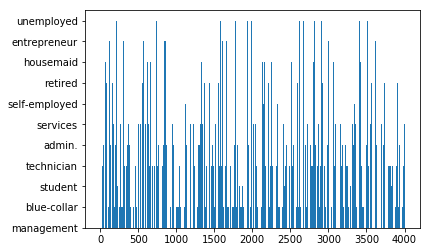

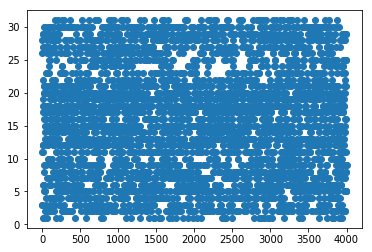

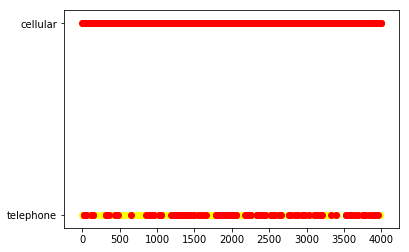

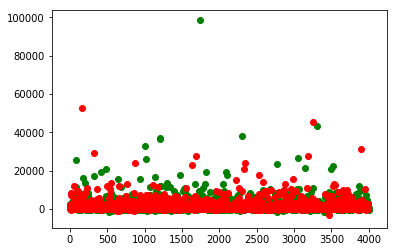

In [56]:
import matplotlib.pyplot as plt

array = df_data_1.values

plt.figure
plt.bar(array[:,0],array[:,2])
plt.show()

plt.figure
plt.scatter(array[:,0],array[:,10])
plt.show()

y = array[:,18]
x1 = array[y==0,:]
x2 = array[y==1,:]

plt.figure
plt.scatter(x1[:,0], x1[:,9], color = 'yellow')
plt.scatter(x2[:,0], x2[:,9], color = 'red')
plt.show()

y = array[:,18]
x3 = array[y==0,:]
x4 = array[y==1,:]
plt.figure
plt.scatter(x3[:,0], x3[:,6], color = 'green')
plt.scatter(x4[:,0], x4[:,6], color = 'red')
plt.show()